In [1]:
!pip install requests

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import requests

def download_file(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download. Status code: {response.status_code}")

# Example usage
download_file('https://example.com/file.zip', 'file.zip')


Failed to download. Status code: 404


In [4]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [5]:

download_file(file_path, 'laptops.csv')
file_name = "laptops.csv"

Downloaded laptops.csv


In [6]:
df = pd.read_csv(file_name, header=0)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [8]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [9]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Evaluating the dataset for misisng values

In [10]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
False    238
Name: Unnamed: 0, dtype: int64

Manufacturer
False    238
Name: Manufacture

### Replacing the missing data with mean

In [11]:
# replacing missing data with mean
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)

# astype() function converts the values to the desired data type
# axis=0 indicates that the mean value is to calculated across all column elements in a row.

### For categorical variable replacing missing data wih mode

In [12]:
# replacing missing data with mode
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

### Fixing the data type

In [13]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

### Data standardization

In [14]:
# Data standardization: convert weight from kg to pounds
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

### Data Normalization

In [15]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

### Binning

In [16]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'Price bins')

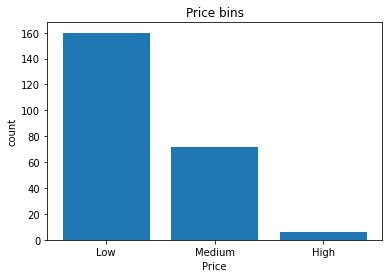

In [17]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

### Indicator Variables

In [18]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [19]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5         14.000000   
1           1         Dell         3    1   1         3         15.598425   
2           2         Dell         3    1   1         7         15.598425   
3           3         Dell         4    2   1         5         13.299213   
4           4           HP         4    2   1         7         15.598425   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price Price-binned  \
0       0.551724       8             256        3.52800    978          Low   
1       0.689655       4             256        4.85100    634          Low   
2       0.931034       8             256        4.85100    946          Low   
3       0.551724       8             128        2.69010   1244          Low   
4       0.620690       8             256        4.21155    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0               0       

### EXPLORATORY DATA ANALYSIS

### Visualize individual feature patterns
#### Continuous valued features

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

(0.0, 3974.15)

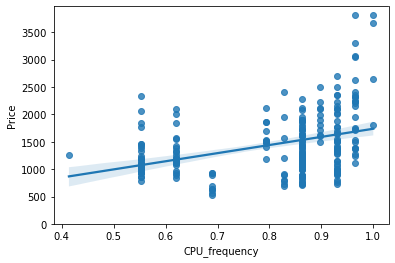

In [21]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

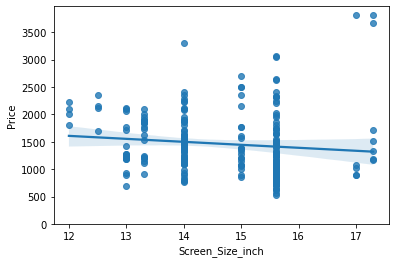

In [22]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

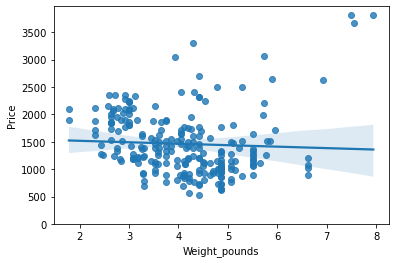

In [23]:
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

In [24]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110565
Price                    -0.110565  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


### Categorical Features

<AxesSubplot:xlabel='Category', ylabel='Price'>

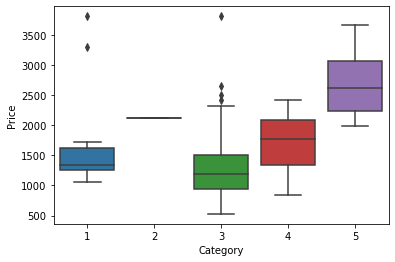

In [25]:
sns.boxplot(x="Category", y="Price", data=df)

<AxesSubplot:xlabel='GPU', ylabel='Price'>

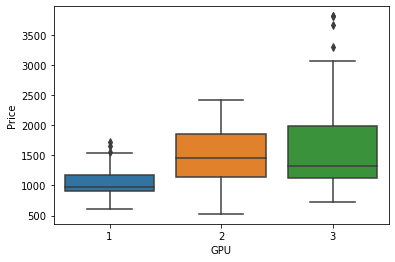

In [26]:
sns.boxplot(x="GPU", y="Price", data=df)

<AxesSubplot:xlabel='OS', ylabel='Price'>

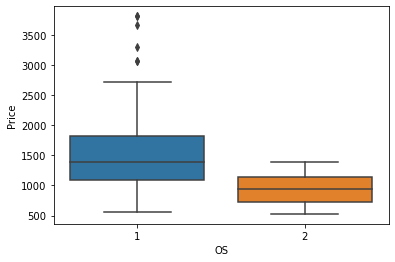

In [27]:
sns.boxplot(x="OS", y="Price", data=df)

<AxesSubplot:xlabel='CPU_core', ylabel='Price'>

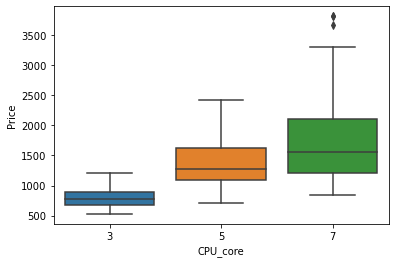

In [28]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

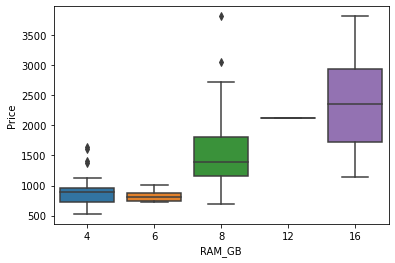

In [29]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<AxesSubplot:xlabel='Storage_GB_SSD', ylabel='Price'>

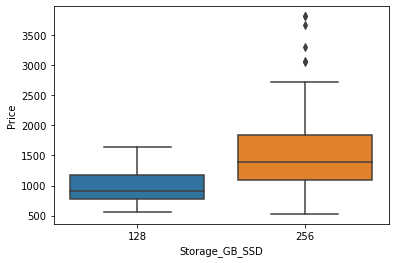

In [30]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

### DESCRIPTIVE STATISTICAL ANALYSIS

In [31]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0    Category         GPU          OS    CPU_core  \
count  238.000000  238.000000  238.000000  238.000000  238.000000   
mean   118.500000    3.205882    2.151261    1.058824    5.630252   
std     68.848868    0.776533    0.638282    0.235790    1.241787   
min      0.000000    1.000000    1.000000    1.000000    3.000000   
25%     59.250000    3.000000    2.000000    1.000000    5.000000   
50%    118.500000    3.000000    2.000000    1.000000    5.000000   
75%    177.750000    4.000000    3.000000    1.000000    7.000000   
max    237.000000    5.000000    3.000000    2.000000    7.000000   

       Screen_Size_inch  CPU_frequency      RAM_GB  Storage_GB_SSD  \
count        238.000000     238.000000  238.000000      238.000000   
mean          14.687951       0.813822    7.882353      245.781513   
std            1.165589       0.141860    2.482603       34.765316   
min           12.000000       0.413793    4.000000      128.000000   
25%           14.000000     

### GroupBy and Pivot Tables

In [32]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [33]:
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


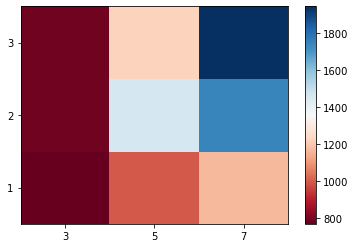

In [34]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

### Pearson Correlation and p-values

In [35]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857845  with a P-value of P = 3.6815606288436336e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588615  with a P-value of P = 5.5024633507147195e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191727792
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11056471275425056  with a P-value of P = 0.0887645673270284
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.0503122583775155  with a P-value of P = 0.4397693853434994
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355117  with a P-value of P = 7.912950127010863e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.2217298011482738  with a P-value of P = 0.0005696642559248033
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881427  with

# Model Development

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

## Single Linear Regression

In [39]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)

/Users/atithi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/atithi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


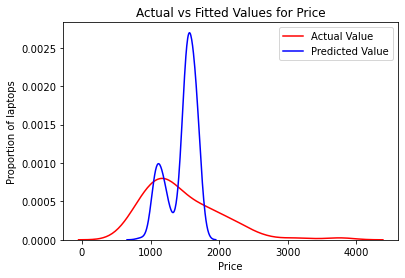

In [40]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [41]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


## Multiple Linear Regression

In [42]:
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

/Users/atithi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/atithi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Proportion of laptops')

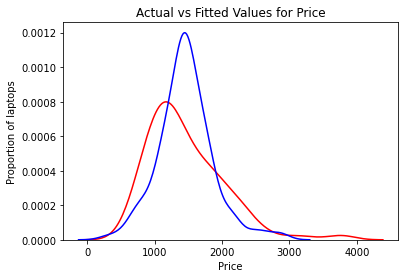

In [43]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

/Users/atithi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/atithi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Proportion of laptops')

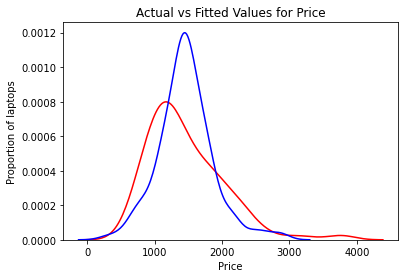

In [44]:
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

## Polynomial Regression

In [46]:
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [48]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

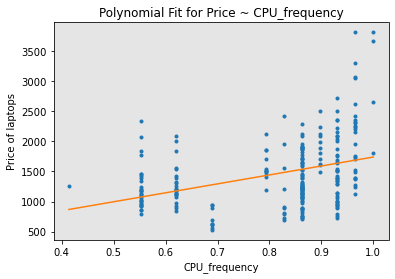

In [49]:
PlotPolly(p1, X, Y, 'CPU_frequency')

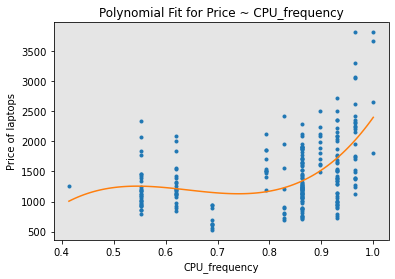

In [50]:
PlotPolly(p3, X, Y, 'CPU_frequency')

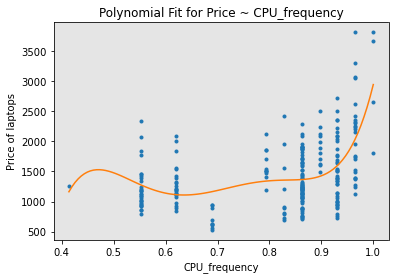

In [51]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [52]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.13444363210243238
The MSE value for 1st degree polynomial is:  284583.44058686297
The R-square value for 3rd degree polynomial is:  0.2669264079653101
The MSE value for 3rd degree polynomial is:  241024.86303848805
The R-square value for 5th degree polynomial is:  0.30308227064431403
The MSE value for 5th degree polynomial is:  229137.29548056007


## Pipeline

In [53]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [54]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  264738.381302521
R^2 for multi-variable polynomial pipeline is:  0.19480208935997623
